<a href="https://colab.research.google.com/github/razaqfatiu/data-visualization/blob/main/lab4_correlation_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'High': ['001', '015'], 'Medium': ['002', '003', '004', '010', '048', '080', '155', '156'], 'Low': ['005', '006', '007', '008', '009', '011', '012', '013', '014', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '13

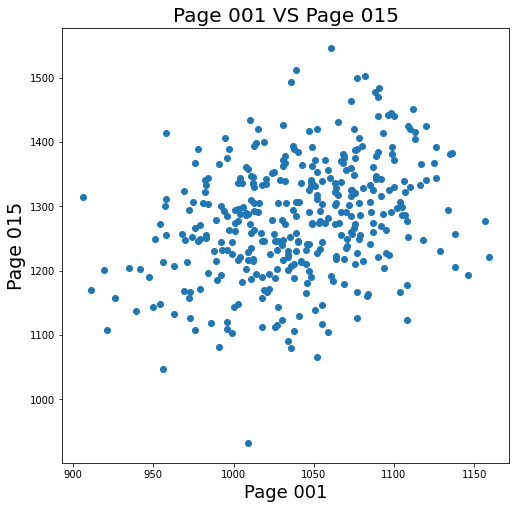

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/Pages/DailyHits.csv', index_col=0)

categories = ['High', 'Medium', 'Low']
cat_selection = {categories[c]: [] for c in range(len(categories)) }

for cat in data.columns:
  total_col_sum = data[cat].sum()
  if total_col_sum > 40000:
    category = categories[0]
  elif total_col_sum > 10000:
    category = categories[1]
  else:
    category = categories[2]
  cat_selection[category].append(cat)

pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

print(cat_selection)

selected = cat_selection['High']

for i, name_i in enumerate(selected):
  for j in range(i+1, len(selected)):
    name_j = selected[j]
    plt.figure(figsize=(8,8))
    plt.scatter(data[name_i], data[name_j])
    plt.title('Page ' + name_i + ' VS Page ' + name_j, fontsize=20)
    plt.xlabel('Page ' + name_i, fontsize=18)
    plt.ylabel('Page ' + name_j, fontsize=19)
    plt.show()


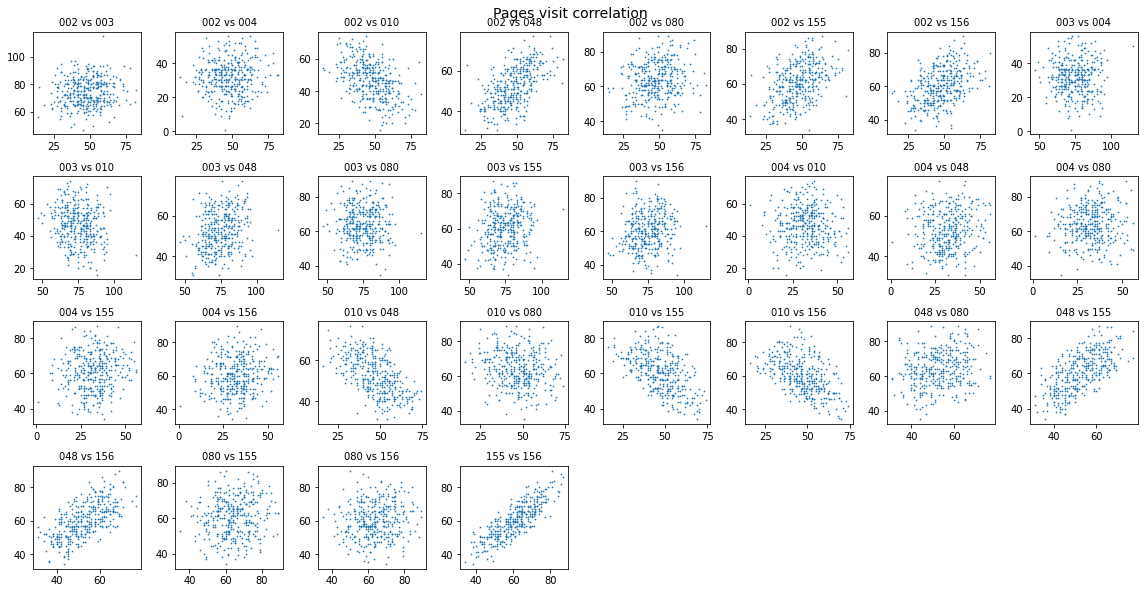

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/Pages/DailyHits.csv', index_col=0)

pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

selected = cat_selection['Medium']
# print(cat_selection)

counter = 1

fig = plt.figure(figsize=(16, 16))
fig.suptitle('Pages visit correlation ', fontsize = 14, position=(0.5, 1.0))

for i, name_i in enumerate(selected):
  for j in range(i+1, len(selected)):
    name_j = selected[j]
    sub = fig.add_subplot(8, 8, counter)
    sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
    sub.scatter(data[name_i], data[name_j], s=0.5)
    counter += 1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


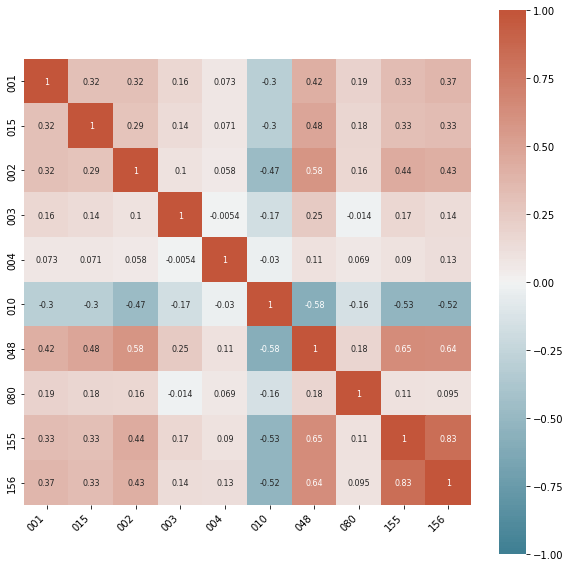

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/Pages/DailyHits.csv', index_col=0)

pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

selected = cat_selection['High'] + cat_selection['Medium']

plt.figure(figsize=(10, 10))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

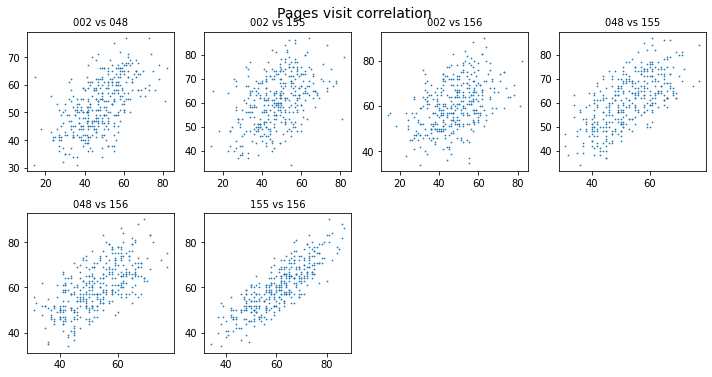

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/Pages/DailyHits.csv', index_col=0)

selected = ['002', '048', '155', '156', ]

counter = 1

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Pages visit correlation ', fontsize = 14, position=(0.5, 1.0))

for i, name_i in enumerate(selected):
  for j in range(i+1, len(selected)):
    name_j = selected[j]
    sub = fig.add_subplot(4, 4, counter)
    sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
    sub.scatter(data[name_i], data[name_j], s=0.5)
    counter += 1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


            002  048  155  156
Date                          
2019-01-01   33   37   39   47
2019-01-02   41   39   59   56
2019-01-03   27   38   58   46
2019-01-04   30   35   39   52
2019-01-05   45   45   40   41


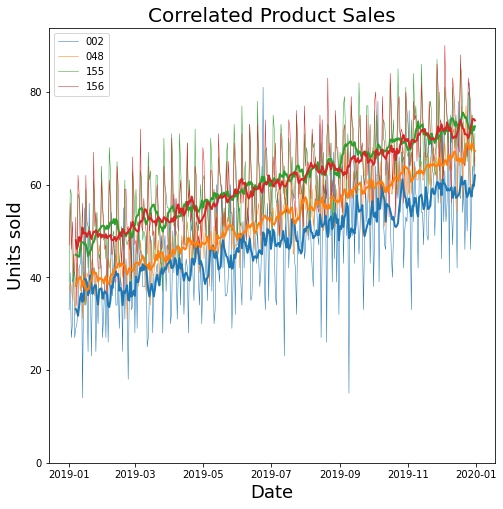

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/Pages/DailyHits.csv', index_col=0)

pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

period = 7
rolling_average = data.rolling(window=period).mean()

selected = ['002', '048', '155', '156', ]

print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
# plt.gca().set_prop_cycle(None)
# for name in selected:
#     x = np.arange(len(data[name]))
#     z = np.polyfit(x, data[name], 1)
#     trend = np.poly1d(z)
#     plt.plot(data.index, trend(x), linestyle='--')
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Correlated Product Sales', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

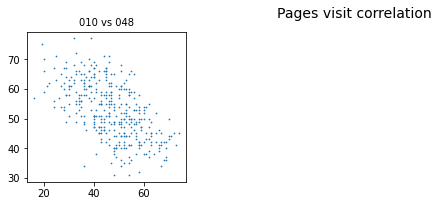

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/Pages/DailyHits.csv', index_col=0)

selected = ['010', '048']

counter = 1

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Pages visit correlation ', fontsize = 14, position=(0.5, 1.0))

for i, name_i in enumerate(selected):
  for j in range(i+1, len(selected)):
    name_j = selected[j]
    sub = fig.add_subplot(4, 4, counter)
    sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
    sub.scatter(data[name_i], data[name_j], s=0.5)
    counter += 1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

            048  010
Date                
2019-01-01   37   69
2019-01-02   39   62
2019-01-03   38   64
2019-01-04   35   52
2019-01-05   45   55


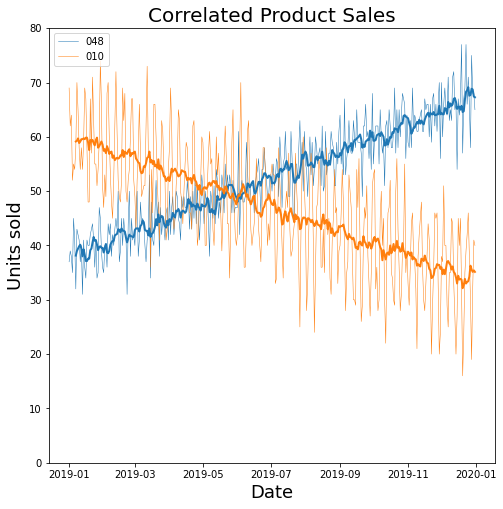

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/Pages/DailyHits.csv', index_col=0)

pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

period = 7
rolling_average = data.rolling(window=period).mean()

selected = ['048', '010']

print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
# plt.gca().set_prop_cycle(None)
# for name in selected:
#     x = np.arange(len(data[name]))
#     z = np.polyfit(x, data[name], 1)
#     trend = np.poly1d(z)
#     plt.plot(data.index, trend(x), linestyle='--')
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Correlated Product Sales', fontsize=20)
plt.legend(selected, loc=2)
plt.show()